In [25]:
# from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np
import pandas as pd
# Import helper functions
from mlfromscratch.supervised_learning import PolynomialRidgeRegression
from mlfromscratch.utils import k_fold_cross_validation_sets, normalize, mean_squared_error
from mlfromscratch.utils import train_test_split, polynomial_features, Plot

In [26]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [2]:

# Load temperature data
data = pd.read_csv('../data/TempLinkoping2016.txt', sep="\t")

time = np.atleast_2d(data["time"].values).T
temp = data["temp"].values

X = time # fraction of the year [0, 1]
y = temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [18]:
poly_degree = 20

# Finding regularization constant using cross validation
lowest_error = float("inf")
best_reg_factor = None
print ("Finding regularization constant using cross validation:")


Finding regularization constant using cross validation:


In [19]:
k = 10
for reg_factor in np.arange(0, 0.1, 0.01):
    cross_validation_sets = k_fold_cross_validation_sets(X_train, y_train, k=k)
    mse = 0
    for _X_train, _X_test, _y_train, _y_test in cross_validation_sets:
        model = PolynomialRidgeRegression(degree=poly_degree, 
                                        reg_factor=reg_factor,
                                        learning_rate=0.001,
                                        n_iterations=10000)
        model.fit(_X_train, _y_train)
        y_pred = model.predict(_X_test)
        _mse = mean_squared_error(_y_test, y_pred)
        mse += _mse
    mse /= k

    # Print the mean squared error
    print ("\tMean Squared Error: %s (regularization: %s)" % (mse, reg_factor))

    # Save reg. constant that gave lowest error
    if mse < lowest_error:
        best_reg_factor = reg_factor
        lowest_error = mse

	Mean Squared Error: 11.806784830445626 (regularization: 0.0)
	Mean Squared Error: 12.077258434850656 (regularization: 0.01)
	Mean Squared Error: 11.883931757810767 (regularization: 0.02)
	Mean Squared Error: 11.942522196263585 (regularization: 0.03)
	Mean Squared Error: 11.915684282973334 (regularization: 0.04)
	Mean Squared Error: 12.141794575753188 (regularization: 0.05)
	Mean Squared Error: 12.17717052587263 (regularization: 0.06)
	Mean Squared Error: 11.938172294810824 (regularization: 0.07)
	Mean Squared Error: 12.35777556975539 (regularization: 0.08)
	Mean Squared Error: 12.622739392684952 (regularization: 0.09)


In [20]:
# Make final prediction
model = PolynomialRidgeRegression(degree=poly_degree, 
                                reg_factor=best_reg_factor,
                                learning_rate=0.001,
                                n_iterations=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
print ("Mean squared error: %s (given by reg. factor: %s)" % (lowest_error, best_reg_factor))

Mean squared error: 11.806784830445626 (given by reg. factor: 0.0)


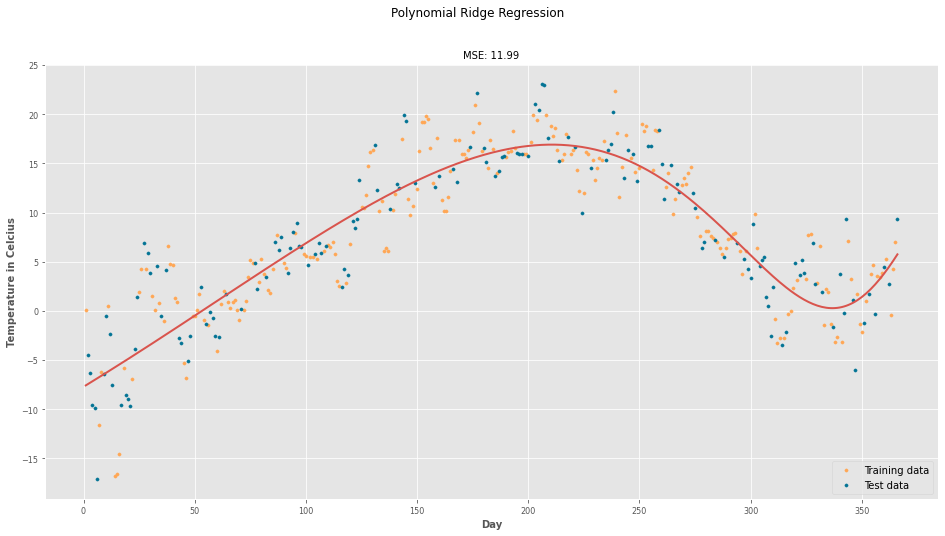

In [33]:
y_pred_line = model.predict(X)

# Color map

f= plt.figure(figsize=(16,8))
# Plot the results
m1 = plt.scatter(366 * X_train, y_train, color=colors[0], s=10)
m2 = plt.scatter(366 * X_test, y_test, color=colors[1], s=10)


plt.plot(366 * X, y_pred_line, color=colors[2], linewidth=2, label="Prediction")
plt.suptitle("Polynomial Ridge Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.xlabel('Day')
plt.ylabel('Temperature in Celcius')
plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()

